In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import scipy.stats as ss
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.pylabtools import figsize
from IPython.display import Image

from openpyxl import load_workbook
from datetime import datetime

#Set graph size
figsize(15,9)

In [2]:
vix = pd.read_csv("/Users/yiwenwei/Downloads/vixcurrent.csv", index_col = 0, parse_dates = True)
vix = vix[vix.index > pd.Timestamp(2016,1,1)]

vix_vol = pd.read_csv("/Users/yiwenwei/Downloads/cfevoloi.csv", index_col = 0, parse_dates = True)
vix_vol = vix_vol[vix_vol.index > pd.Timestamp(2016,1,1)]

In [3]:
vix.head()

,VIX Open,VIX High,VIX Low,VIX Close
Date,,,,
2016-01-04,22.48,23.36,20.67,20.70
2016-01-05,20.75,21.06,19.25,19.34
2016-01-06,21.67,21.86,19.80,20.59
2016-01-07,23.22,25.86,22.40,24.99
2016-01-08,22.96,27.08,22.48,27.01


In [4]:
vix_vol.head()

,VOLATILITY INDEX VOLUME,VOLATILITY INDEX OI,S&P 500 Variance Volume,S&P 500 Variance OI,Corporate Bond High Yield Volume,Corporate Bond High Yield OI,Coporate Bond Liquid Investment Grade Volume,Coporate Bond Liquid Investment Grade OI,CBOE/CBOT 10YR US TREASURY NOTE VOLATILITY INDEX VOLUME,CBOE/CBOT 10YR US TREASURY NOTE VOLATILITY INDEX OI,...,CHINA INDEX FUTURES VOLUME,CHINA INDEX FUTURES OI,CBOE S&P 500 BUYWRITE INDEX VOLUME,CBOE S&P 500 BUYWRITE INDEX OI,CBOE Nasdaq-100 Volatility Index VOLUME,CBOE Nasdaq-100 Volatility Index OI,DJIA Volatility Index VOLUME,DJIA Volatility Index OI,CBOE Russell 2000 Volatility Index VOLUME.1,CBOE Russell 2000 Volatility Index OI.1
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,280291,252784,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,192421,243834,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,218308,243749,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,403621,259379,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,313403,253493,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
vix['difference'] = vix['VIX Open'] - vix['VIX Close']

In [8]:
uncertain2 = pd.read_csv("WLEMUINDXD.csv", index_col = 0, parse_dates = True)

In [9]:
uncertain2.head()

,WLEMUINDXD
DATE,
2014-05-03,10.91
2014-05-04,18.97
2014-05-05,11.99
2014-05-06,77.14
2014-05-07,6.92


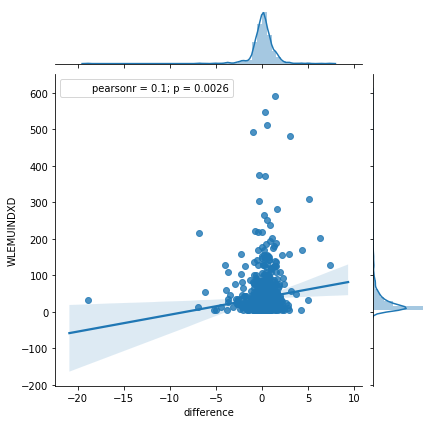

In [10]:
sns.jointplot(vix.iloc[:,4],  uncertain2.iloc[:,0].loc[vix.index],  kind="reg",\
                                                 stat_func=ss.pearsonr)

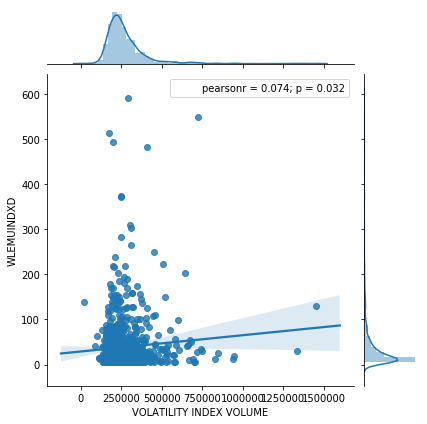

In [11]:
sns.jointplot(vix_vol.iloc[:,0],  uncertain2.iloc[:,0].loc[vix_vol.index],  kind="reg",\
                                                 stat_func=ss.pearsonr)

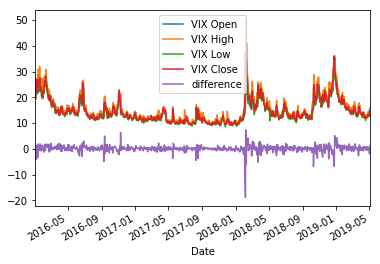

In [12]:
vix.plot()

In [13]:
from matrixprofile import *

Text(0.5, 0, 'Sample')

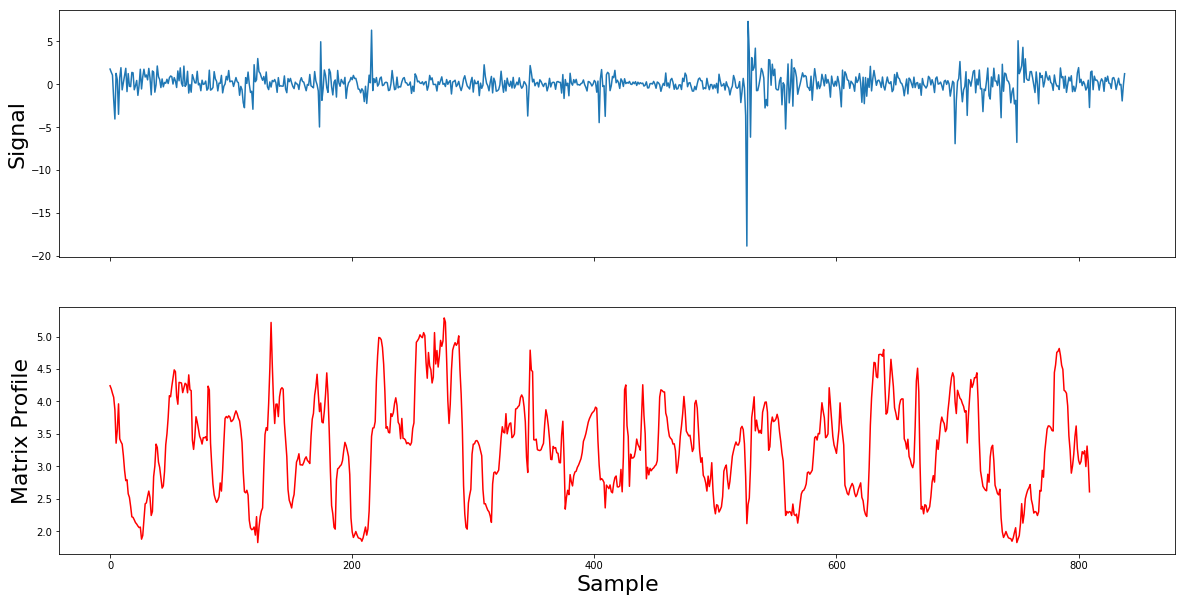

In [14]:
m = 30
mp = matrixProfile.stomp(vix.iloc[:,3].values ,m)

mp_adj_vix = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(vix.iloc[:,4].values)),vix.iloc[:,4].values, label="Original Signal")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj_vix)),mp_adj_vix, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

Text(0.5, 0, 'Sample')

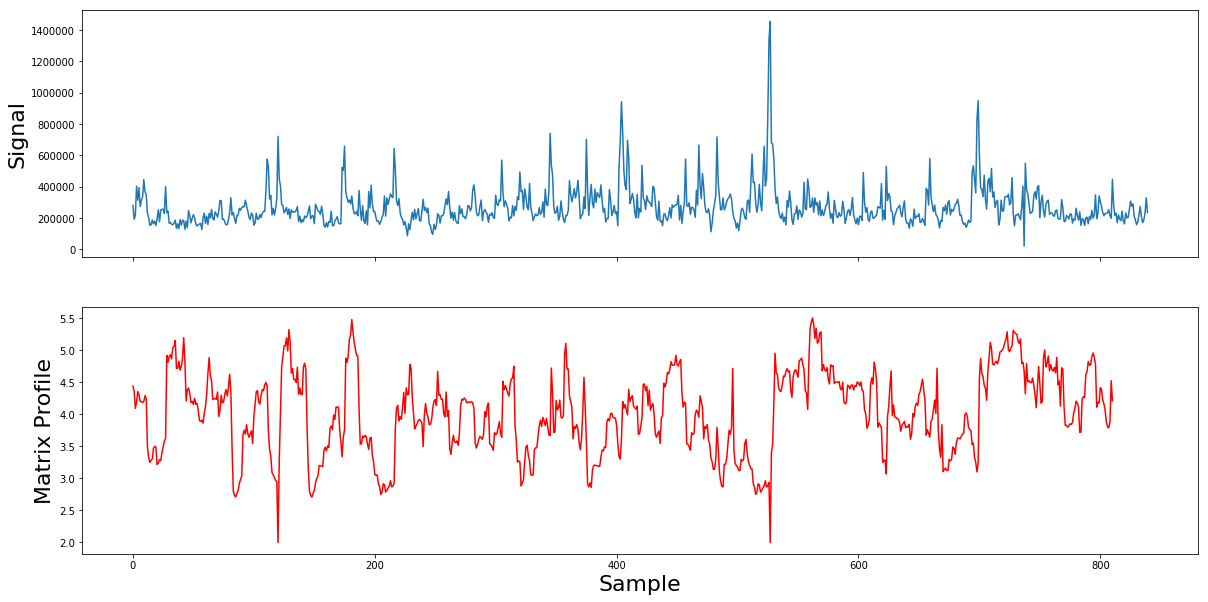

In [40]:
m = 30
mp = matrixProfile.stomp(vix_vol.iloc[:,0].values ,m)

mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(vix_vol.iloc[:,0].values)),vix_vol.iloc[:,0].values, label="Original Signal")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

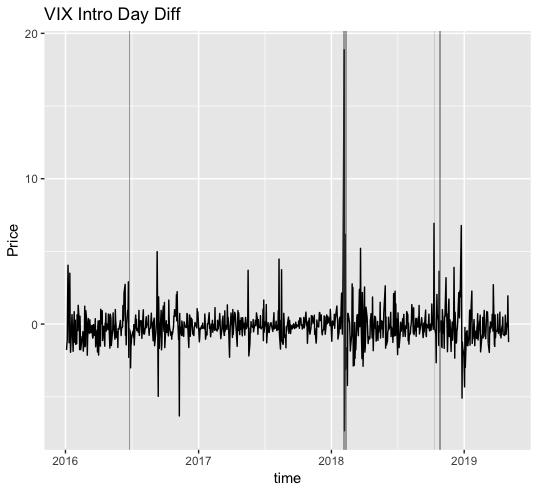

In [16]:
Image("Rplot.png")

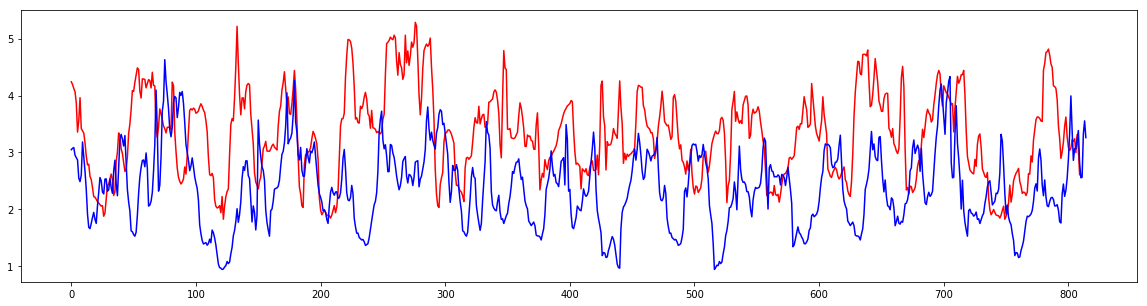

In [27]:
figsize(20,5)
plt.plot(np.arange(len(mp_adj_vix)),mp_adj_vix, color = 'r')
plt.plot(np.arange(len(mp_adj_signal)),mp_adj_signal, color = 'b')

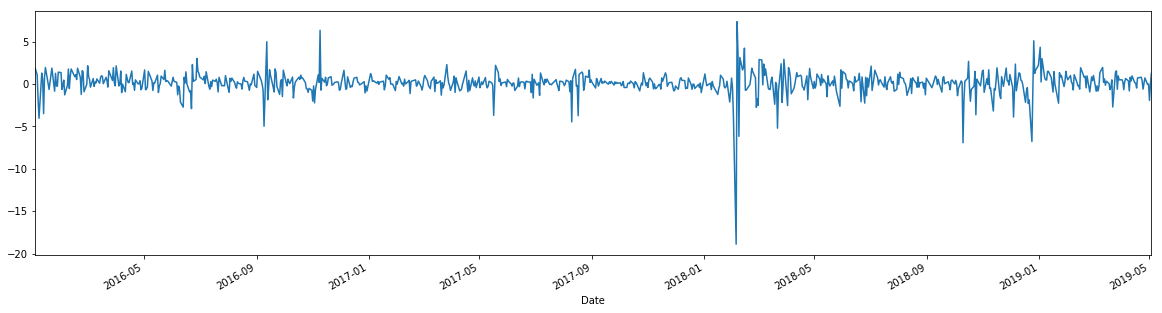

In [28]:
vix.iloc[:,4].plot()